# Especializacion en Internet de las Cosas
# Aprendizaje Automatico
# Trabajo Practico N°1
## Alumno: Gonzalo Carreno

## Desarrollo

In [278]:
import pandas as pd
import matplotlib.pyplot as plt


#### Funciones utilizadas 

In [279]:


def rename_reatures(df):
    renamed_columns = {}
    for c in df.columns:
        renamed_columns[c] = c.replace(' ' , '_') 
    print(f'Renaming: {renamed_columns}')
    df = df.rename(columns=renamed_columns)
    return df

def plot_correlation_matrix(df, graphWidth):
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

def print_histograms(df):
    for c in df.columns.values:
        df[c].plot(kind='hist' , title=c , bins=20)
        plt.show()


def plot_scatter(df , x , y):
    plt.figure(figsize=(7, 5))
    plt.scatter(df[x], df[y] , color='r', marker="x",s=60)
    plt.grid(True, linewidth=0.5)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.show()


#sklean no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):
    return np.mean((yreal-ypred)/yreal)

### 1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, ¿cuáles variables parecen estar correlacionadas? y con respectos a la calidad del vino?

In [330]:
path = './datasets/winequality-red.csv'
df = pd.read_csv(path)

#### En las siguientes lineas podemos analyzar los tipos de datos del data frame asi como sus parametros de distribucion mediante las funciones:
- dtypes
- info

In [331]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### por un tema de comodidad en el manejo de los datos prefiero renombrar los features eliminando los espacios

In [333]:
df = rename_reatures(df)

Renaming: {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide', 'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality'}


In [299]:
df.columns.values

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

#### En las siguientes lineas podemos apreciar el la distrubucion de los datos mediante la visualizacion de histogramas y el uso de la funcion describe

In [303]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


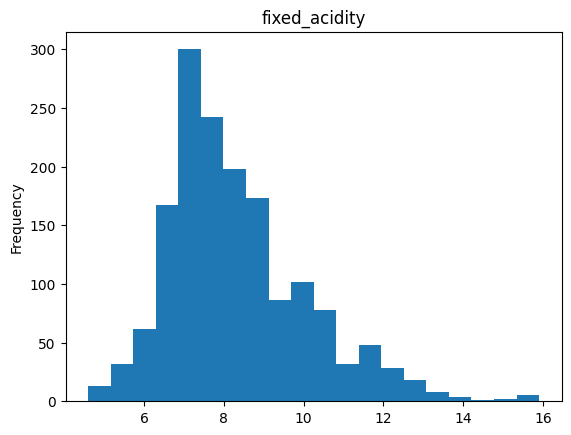

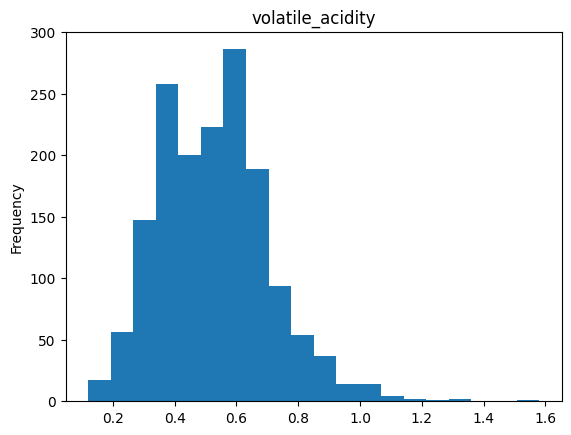

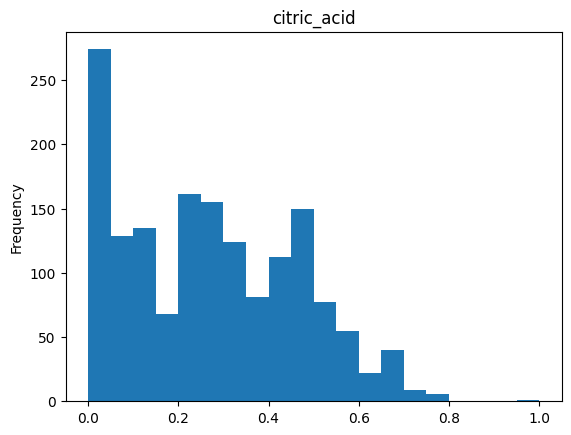

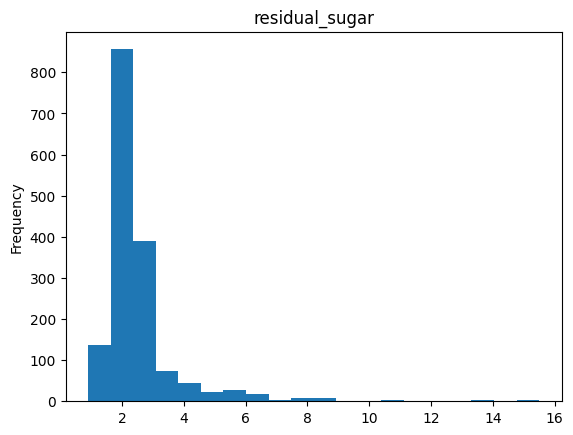

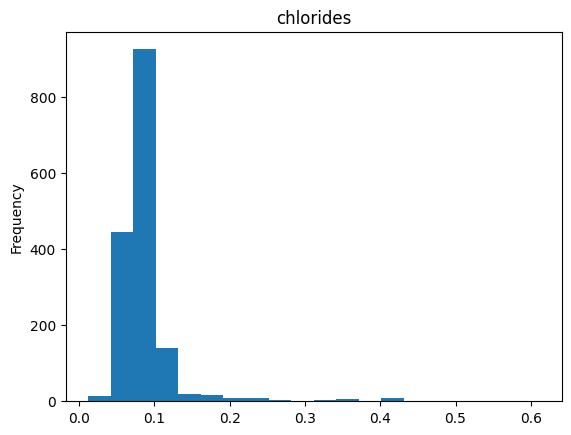

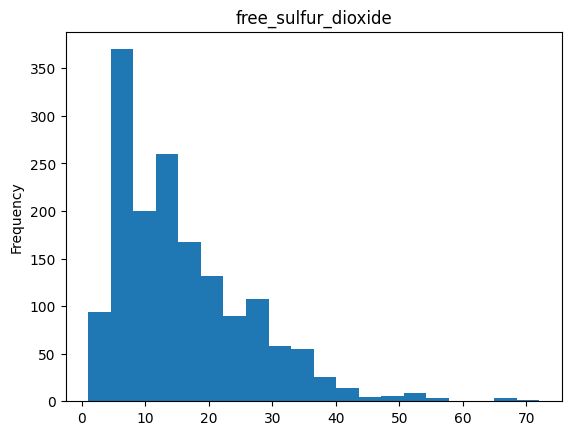

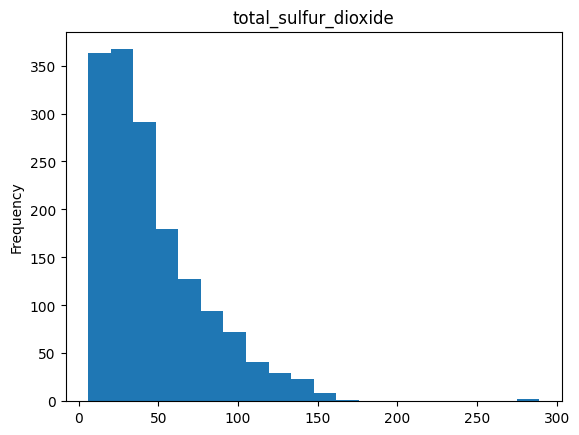

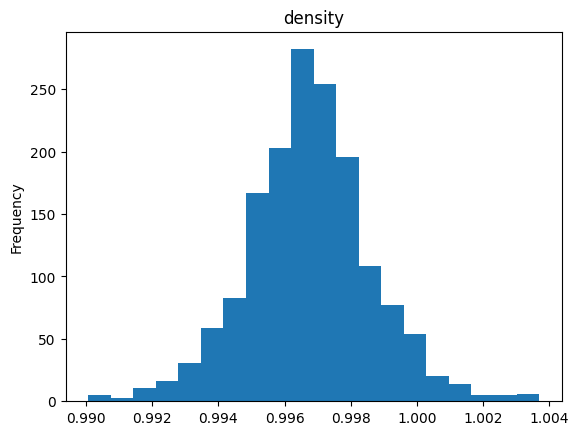

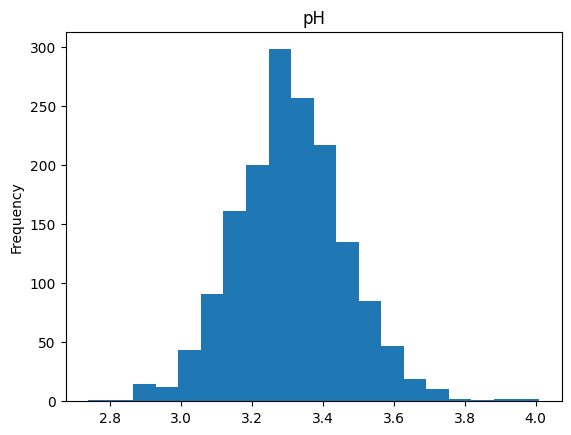

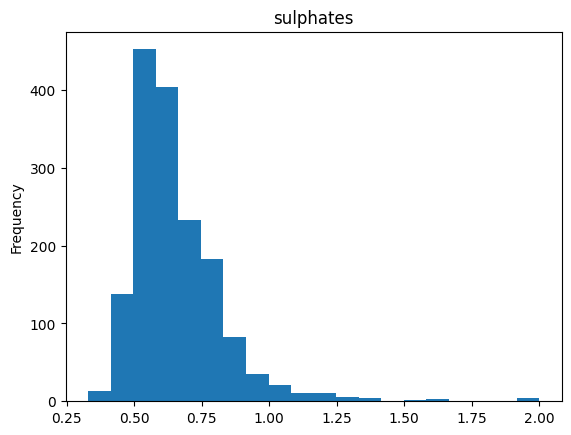

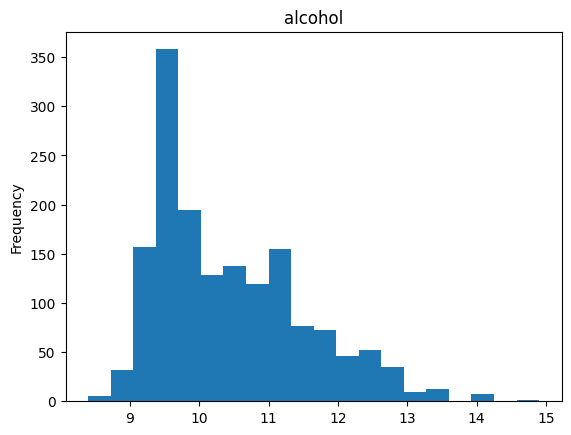

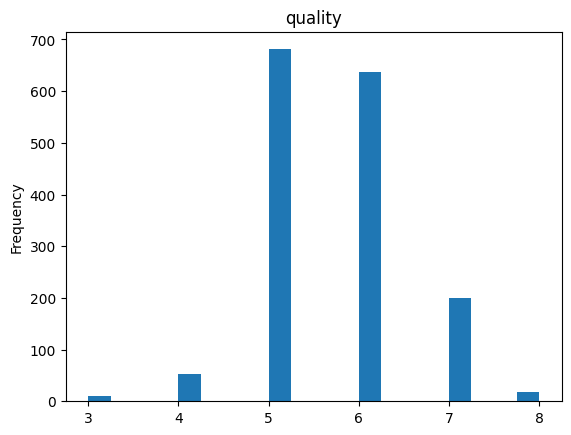

In [304]:
print_histograms(df)

#### En la siguiente matriz de correlacion podemos apreciar el nivel de correlacion entre las variables. Como se puede observar las variables con un mayor nivel de correlacion (entre 0.6 y 0.8) son:
- citric_acid y fixed_acidity
- density y fixed_acidity
- total_sulfur_dioxide y free_sulfur_dioxide

#### Luego, con respecto a la calidad del vino, el nivel de alcohol parece ser la variable con mayor nivel de correlacion,
- alcohol y density (0.476166)

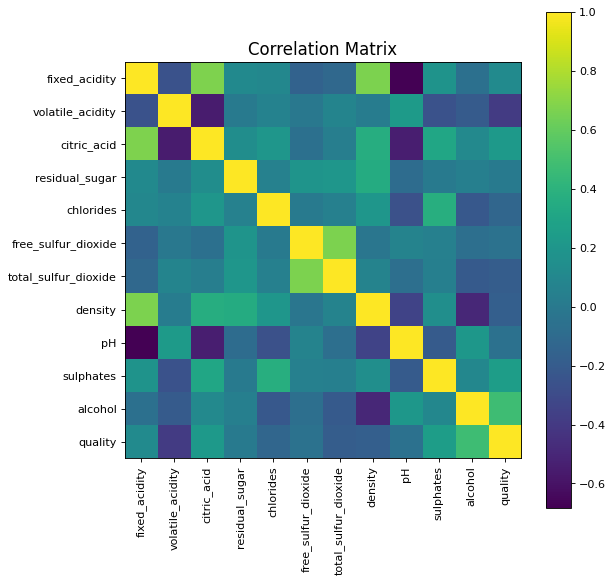

In [305]:
plot_correlation_matrix(df, 8)

In [306]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Graficando la linealidad entre las variables con mayor correlacion

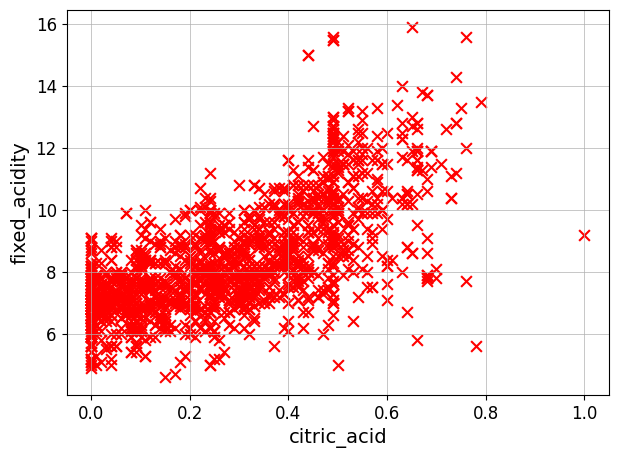

In [307]:
plot_scatter(df, 'citric_acid' , 'fixed_acidity')

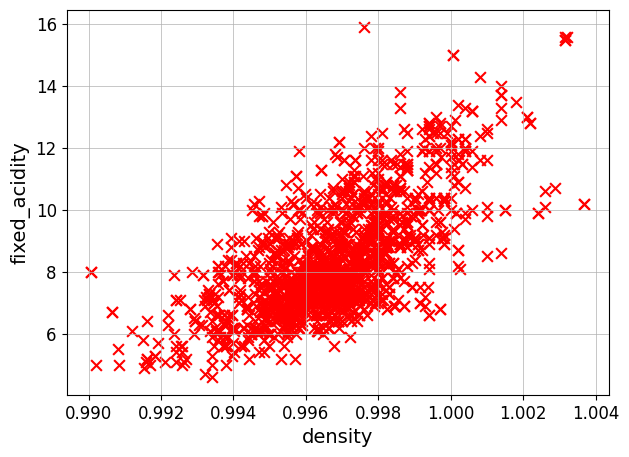

In [308]:
plot_scatter(df, 'density' , 'fixed_acidity')

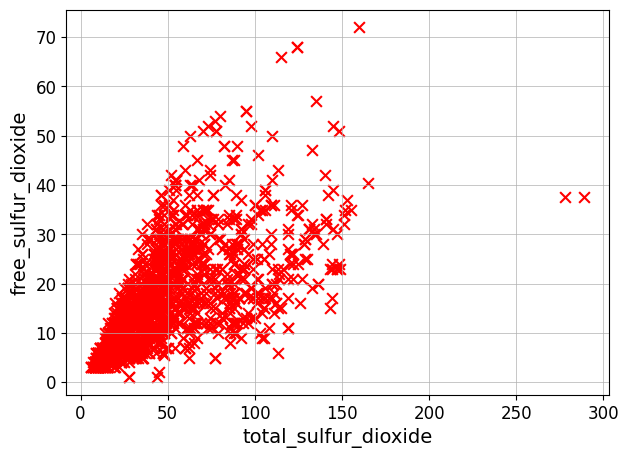

In [309]:
plot_scatter(df, 'total_sulfur_dioxide' , 'free_sulfur_dioxide')

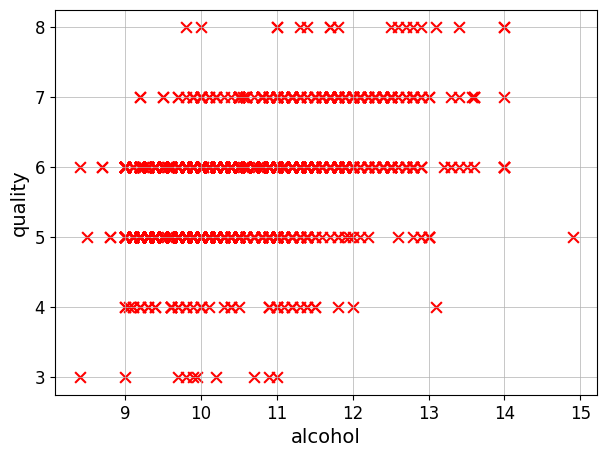

In [310]:
plot_scatter(df, 'alcohol' , 'quality')

### 2. Realice si es necesario limpieza de datos y corrección de errores.


#### Todos los features son del tipo numerico con valores no nulos, no parece ser necasario realizar formateo o cambio de tipo de datos

In [311]:
# no hay valores nulos
#
print(len(df))
print(len(df.dropna()))

1599
1599


#### No obstante como se puede apreciar en el histograma de nivel de alcohol, existen outliers dado que hay valores que estan representados por muy pocas muestras

Mientras que apra niveles de alcohol entre 9 y 13 tenemos mas de 100 muestras, para los que se encuentran fuera de estos intervalos tenemos unas 66 muestras, por lo cual podriamos considerarlos outliers y removerlos del data set para no afectar el modelo generando biases.

In [312]:
print(len( df[(df['alcohol'] <= 9) | (df['alcohol'] >= 13) ] ))

66


<Axes: ylabel='Frequency'>

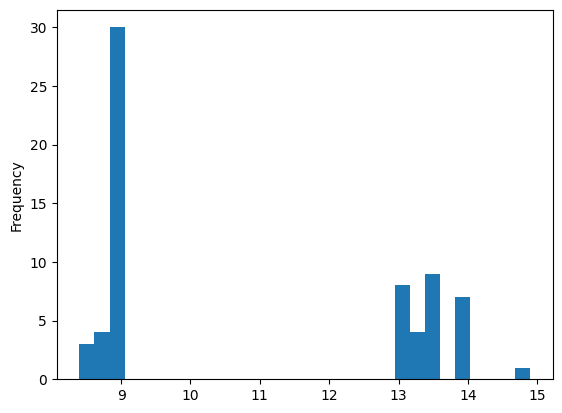

In [313]:
df[ (df['alcohol'] <= 9) | (df['alcohol'] >= 13) ]['alcohol'].plot.hist(bins=30)

Entonces eliminando los outliers, nos queda algo mas homogeneo en cuanto a distribucion de datos

<Axes: ylabel='Frequency'>

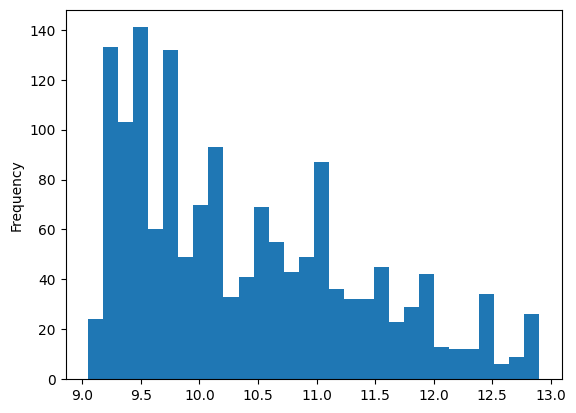

In [314]:
df[(df['alcohol'] > 9) & (df['alcohol'] <13) ]['alcohol'].plot.hist(bins=30)

In [315]:
df = df[(df['alcohol'] > 9) & (df['alcohol'] <13) ]

Lo mismo sucede para los demas features pero para hago la limpieza pertinente mas adelante para el modelo de regresion multiple

### 3. Construya un modelo de regresión lineal simple, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
	1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
	2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)
	3. Entrene el modelo con el set de entrenamiento.
	4. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [317]:
# Armamos array de Numpy con los features
X = df['alcohol'].values
X = X.reshape([-1, 1])
y = df['quality'].values

#### 3.1 Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 1226
Valores de y_train: 1226
Valores de X_test: 307
Valores de y_test: 307


#### 3.2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)


Dado que elimine los outliers del dataset decido utilizar MAE para no tener en cuenta estos valores

#### 3.3 Entrene el modelo con el set de entrenamiento.

En la siguiente linea se puede apreciar la invocacion a la funcion fit que realizara el entrenamiento del modelo

In [319]:
regresion = LinearRegression()

In [320]:
regresion.fit(X_train, y_train)

LinearRegression()

#### 3.4 Evaluacion del modelo con la métrica de evaluación y el coeficiente de Pearson.

##### Calculando MAE

In [321]:
y_pred = regresion.predict(X_test)
r2score_multiple = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio:", mae)
print(f"R cuadrado es: {r2score_multiple}")
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

Error absoluto medio: 0.49878485374180337
R cuadrado es: 0.2445415228271388
El coeficiente de Pearson es 0.2308586369663247


##### Si queremos visualizar la linealidad

(0.0, 8.25)

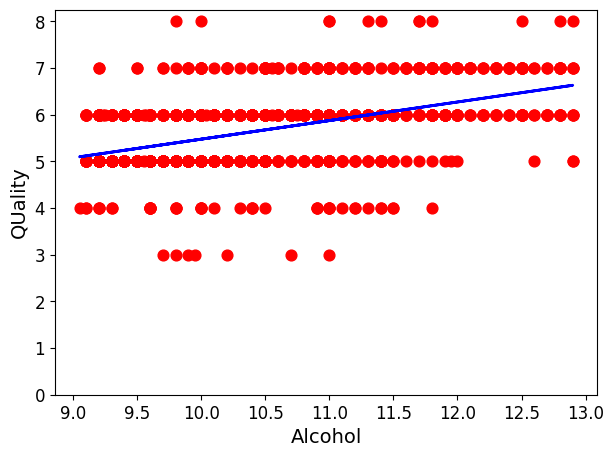

In [322]:
plt.figure(figsize=(7, 5))
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('QUality', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.scatter(X_train, y_train, color='r', marker="o", s=60)
plt.plot(X_train, regresion.predict(X_train), color="b", linewidth=2)

plt.ylim(0) 

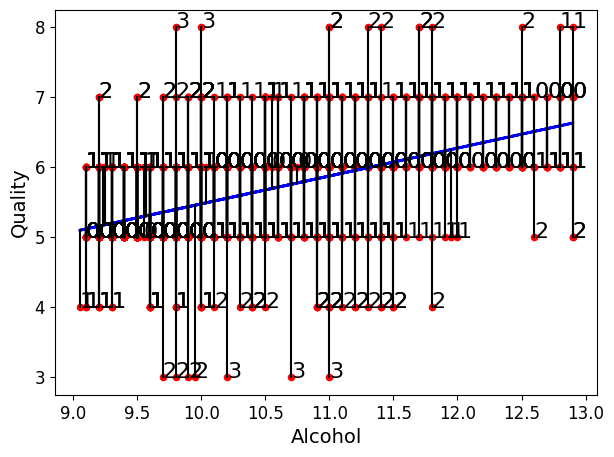

In [323]:
# Convertir X_train en un vector unidimensional
X_train = X_train.flatten()

# Regresión lineal
regression = np.polyfit(X_train, y_train, 1)
regression_line = np.polyval(regression, X_train)

# Calcular las distancias entre los puntos y la línea de regresión
distances = np.abs(regression_line - y_train)

# Graficar los puntos
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='r', s=20)

# Graficar la línea de regresión
plt.plot(X_train, regression_line, color='b', linewidth=2)

# Graficar las líneas perpendiculares desde cada punto a la línea de regresión
for x, y, distance in zip(X_train, y_train, distances):
    plt.plot([x, x], [y, regression[0]*x + regression[1]], color='black', linestyle='-')
    plt.text(x, y, f'{distance:.0f}', ha='left', va="baseline", fontsize=16)

# Configuraciones adicionales

plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Quality', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Mostrar el gráfico
plt.show()

Finalmente de los diagramas anteriores podemos ver que la recta, como se puede esperar, no hace un buen fit de los puntos.

### 4. Construya un modelo de regresión lineal múltiple, usando todos los atributos
	4.1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
	4.2. Entrene el modelo con el set de entrenamiento.
	4.3. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson. Use la misma métrica que en el punto anterior.

#### Primero un poco de limpieza de datos nuevamente, pero esta vez para los demas features

Para limpiar los valores eliminando outliers en el modelo de regresion multiple analizo graficamente los histogramas y observo por ejemplo lo siguiente
- fixed_acidity: tiene outliers para valores fuera del rango [ 5.8 - 10.9] approx
- volatile_acidity: tiene outliers para valores fuera del rango [ 0.2 - 0.9] approx
- critic_acidity: tiene outliers para valores mayores a 0.5
- residual_sugar: tiene outliers para valores fuera del rango a [1.5 - 2.7]
- etc

De esta manera continuo y elimino todos los outliers antes de entrenar el modelo

In [334]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [335]:
# Armamos array de Numpy con los features
X = df[features].values
y = df['quality'].values

##### 	4.1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 14069
Valores de y_train: 1279
Valores de X_test: 320
Valores de y_test: 320


##### 	4.2. Entrene el modelo con el set de entrenamiento.


In [337]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)

LinearRegression()

##### 	4.3. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson. Use la misma métrica que en el punto anterior.


In [338]:
y_pred = regresion.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2score_multiple = r2_score(y_test, y_pred)
print("Error absoluto medio:", mae)
print(f"R cuadrado es: {r2score_multiple}")
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

Error absoluto medio: 0.5035304415524365
R cuadrado es: 0.40318034127962143
El coeficiente de Pearson es 0.3479926193529862


## Conclusiones 
Como podemos apreciar en los valores de los coeficientes de Pearson (practicamente iguales a R2), solo un 24% de la variacion de la calidad del vino puede ser explicada por la variacion de la cantidad de alcohol en el modelo de regresion simple, dando un error MAE total de 0.498.
Por otro lado, en el modelo de regresion multiple, existe un incremento en el coeficiente de Person, implicando que un porcentaje un poco mayor (36%) de la variacion de la calidad del vino puede ser explicada como consecuencia de la variacion de los features del modelo, y favorablemente el error MAE se reduce, implicando que el modelo es ligeramente superior.
No obstante, ambos modelos pueden considerarse limitados en su capacidad predictiva debido a que los valores de su coeficiente Perason (R2) es bastante bajo.


## Apendices

### Apendice 1 - Otros metodos encontrados para calcular el coeficiente de Pearson

Otras formas de calcular Pearson

In [185]:
# - Utilizando la funcion r_regression del modulo 'sklearn.feature_selection'
from sklearn.feature_selection import r_regression 
print(f'Pearson usando sklearn.feature_selection: {r_regression(X_train, y_train)}')

from scipy.stats import pearsonr
corr, _ = pearsonr(X_train.flatten(), y_train)
print(f'Pearsons correlation usando scipy.stats: {corr}' )

Pearson usando sklearn.feature_selection: [0.48047751]
Pearsons correlation usando scipy.stats: 0.48047750932413563


### Apendice 2 - eliminando mas outliers parece aumentar la precision del modelo
Probando eliminar los outliers obtenemos un modelo con menor MAE aunque no un mayor R2

In [339]:
df = df[(df['fixed_acidity'] > 5.8) & (df['fixed_acidity'] < 10.9)]
df = df[(df['volatile_acidity'] > 0.2) & (df['volatile_acidity'] < 0.9)]
df = df[(df['citric_acid'] < 0.5)]
df = df[(df['residual_sugar'] < 2.7) & (df['residual_sugar'] >1.5 )]
df = df[(df['chlorides'] < 0.1) & (df['chlorides'] >0.06 )]
df = df[(df['free_sulfur_dioxide'] < 36) & (df['free_sulfur_dioxide'] > 3) ]
df = df[(df['total_sulfur_dioxide'] < 100) ]
df = df[(df['density'] < 1) & (df['density'] > 0.994) ]
df = df[(df['pH'] < 3.5) & (df['pH'] > 3.1) ]
df = df[(df['sulphates'] < 0.8) & (df['sulphates'] > 0.47) ]

In [340]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [341]:
# Armamos array de Numpy con los features
X = df[features].values
y = df['quality'].values

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 4004
Valores de y_train: 364
Valores de X_test: 92
Valores de y_test: 92


In [343]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)

LinearRegression()

In [344]:
y_pred = regresion.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2score_multiple = r2_score(y_test, y_pred)
print("Error absoluto medio:", mae)
print(f"R cuadrado es: {r2score_multiple}")
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

Error absoluto medio: 0.4661031739174063
R cuadrado es: 0.38971895774176657
El coeficiente de Pearson es 0.3084142203285337
